###  Importing all the libraries

In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


### Reading the file 

In [73]:
data = pd.read_csv(r"C:/Users/Shivani/Downloads/mushrooms.csv")
data.head(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


### Let us check if there is any null values

In [74]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [75]:
data['class'].unique()

array(['p', 'e'], dtype=object)

**Thus we have two claasification. Either the mushroom is poisonous or edible**

In [76]:
data.shape

(8124, 23)

**Thus we have 22 features(1st one is label)  and 8124 instances.Now let us check which features constitutes maximum information.** 

**We can see that the dataset has values in strings.We need to convert all the unique values to integers. Thus we perform label encoding on the data.**

In [77]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Checking the encoded values

In [78]:
data['stalk-color-above-ring'].unique()

array([7, 3, 6, 4, 0, 2, 5, 1, 8])

In [79]:
print(data.groupby('class').size())

class
0    4208
1    3916
dtype: int64


**Separating features and label**

In [80]:
X = data.iloc[:,1:23]  # all rows, all the features and no labels
y = data.iloc[:, 0]  # all rows, label only
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [81]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [82]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [83]:
data.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


# Standardising the data

In [84]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

**Note**: We can avoid PCA here since the dataset is very small.

# Principal Component Analysis

In [85]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -1.11186628e-18],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  3.04117333e-18],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  1.34910107e-18],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  4.89864643e-20],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -2.78283493e-21],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  5.19441712e-21]])

In [86]:
covariance=pca.get_covariance()
covariance

array([[ 1.00012311e+00, -5.04598689e-02, -4.82087723e-02,
        -3.53784857e-02, -2.19379500e-02,  7.88747759e-02,
         1.31976727e-02,  5.40569473e-02, -6.03950664e-03,
         6.38020697e-02,  3.01947722e-02, -3.04209144e-02,
        -3.25951166e-02, -3.16631918e-02, -3.03935589e-02,
         6.30298183e-19,  7.25693997e-02, -1.06546915e-01,
        -2.54597238e-02, -7.34245762e-02,  6.34209571e-02,
        -4.22261061e-02],
       [-5.04598689e-02,  1.00012311e+00, -1.94041011e-02,
         7.02370673e-02,  4.52388718e-02, -3.41840973e-02,
        -2.82340541e-01,  2.08125459e-01, -1.61037318e-01,
        -1.41243642e-02, -1.26260048e-01,  8.91013054e-02,
         1.07977800e-01,  6.60584116e-02,  6.88933788e-02,
        -3.95985387e-16, -1.66054596e-02, -2.61503505e-02,
        -1.06420046e-01,  2.30392413e-01,  2.15577812e-02,
         1.63906824e-01],
       [-4.82087723e-02, -1.94041011e-02,  1.00012311e+00,
        -7.64543349e-04, -3.87168603e-01,  4.14406892e-02,
    

In [87]:
explained_variance=pca.explained_variance_
explained_variance

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 3.85578862e-36])

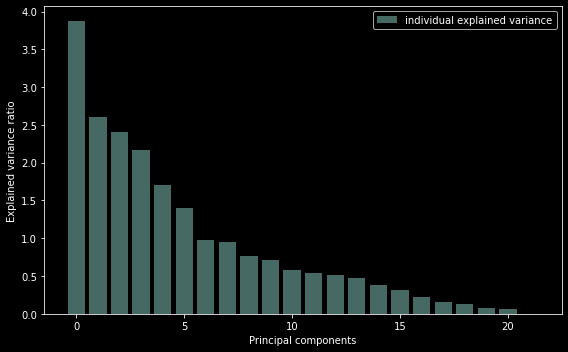

In [88]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 5))
    
    plt.bar(range(22), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

**We can see that the last 4 components has less amount of variance  of the data.The 1st 17 components retains more than 90% of the data.**

### Let us take only first two principal components and visualise it using K-means clustering

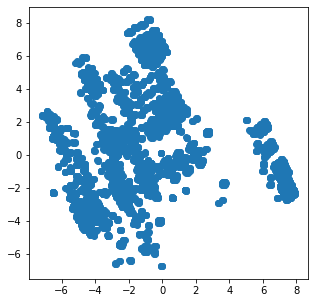

In [89]:
N=data.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])
plt.show()

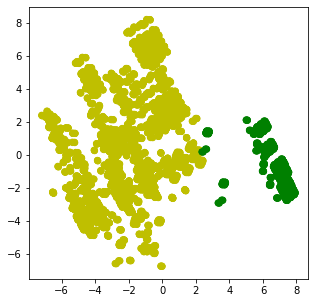

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1], c= label_color)
plt.show()

### Thus using K-means we are able segregate 2 classes well using the first two components with maximum variance.

### Splitting the data into training and testing dataset

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
pca2 = PCA(n_components=17)
X_train2 = pca2.fit_transform(X_train)
X_test2 = pca2.fit_transform(X_test)

RandomForestClassifier

In [107]:
from sklearn.ensemble import RandomForestClassifier

model_RR1=RandomForestClassifier()
               

In [108]:
model_RR1.fit(X_train,y_train)

RandomForestClassifier()

In [109]:
y_pred = model_RR1.predict(X_test)
y_pred


array([0, 1, 1, ..., 1, 1, 0])

In [110]:
from sklearn import metrics

#metrics.accuracy_score(y_test,y_pred)
model_RR1.score(X_test,y_test)

1.0

In [111]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[845,   0],
       [  0, 780]], dtype=int64)

After PCA

In [112]:
pca2 = PCA(n_components=4).fit(X_train)
X_train2 = pca2.transform(X_train)
X_test2 = pca2.transform(X_test)

In [113]:
model_RR2=RandomForestClassifier()

In [114]:
model_RR2.fit(X_train2,y_train)
#y_pred2 = model_RR2.predict(X_test2)
#y_pred2

RandomForestClassifier()

In [115]:
y_pred2 = model_RR2.predict(X_test2)
y_pred2

array([0, 1, 1, ..., 1, 1, 0])

In [116]:
#metrics.accuracy_score(y_test,y_pred2)
model_RR2.score(X_test2,y_test)

0.9938461538461538

In [123]:
model_RR3=RandomForestClassifier()

In [124]:
pca3 = PCA(n_components=2).fit(X_train)
X_train3 = pca2.transform(X_train)
X_test3 = pca2.transform(X_test)
model_RR3.fit(X_train3,y_train)

RandomForestClassifier()

In [125]:
def decision_boundary(X, y, fitted_model):
    
    fig = plt.figure(figsize = (9,4), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        
        plt.subplot(1,2,i+1)
        step = 0.01
        x_max = X[:,0].max() + .1
        x_min = X[:,0].min() - .1
        y_max = X[:,1].max() + .1
        y_min = X[:,1].min() - .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

        if i==0:
            # Flatten the meshgrid into one column to perform prediction
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                # Flatten the meshgrid into one column to perform prediction
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', 
                         horizontalalignment='center', verticalalignment='center', 
                         transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break        
        
        # Reshape the column with predicted values into a two-dimensional grid
        Z = Z.reshape(xx.shape)
        
        # Plot the decision boundary and probabilities
        plt.scatter(X[y.values==0,0], X[y.values==0,1], label = 'Edible', alpha = 0.4, s = 5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], label = 'Poisonous', alpha = 0.4, s = 5)
        plt.imshow(Z, interpolation = 'nearest', extent = (x_min, x_max, y_min, y_max), alpha = .15, origin = 'lower')
        plt.title(plot_type + '\n' + str(fitted_model).split('(')[0] +
                                         'Test Accuracy: ' + str(round(fitted_model.score(X, y),5)))
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        plt.gca().set_aspect('equal')
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    
    return fig

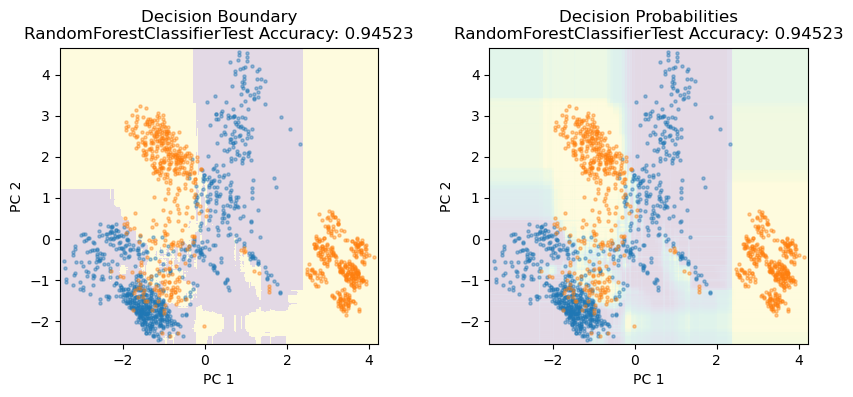

In [127]:
fig = decision_boundary(X_test3, y_test, model_RR3)